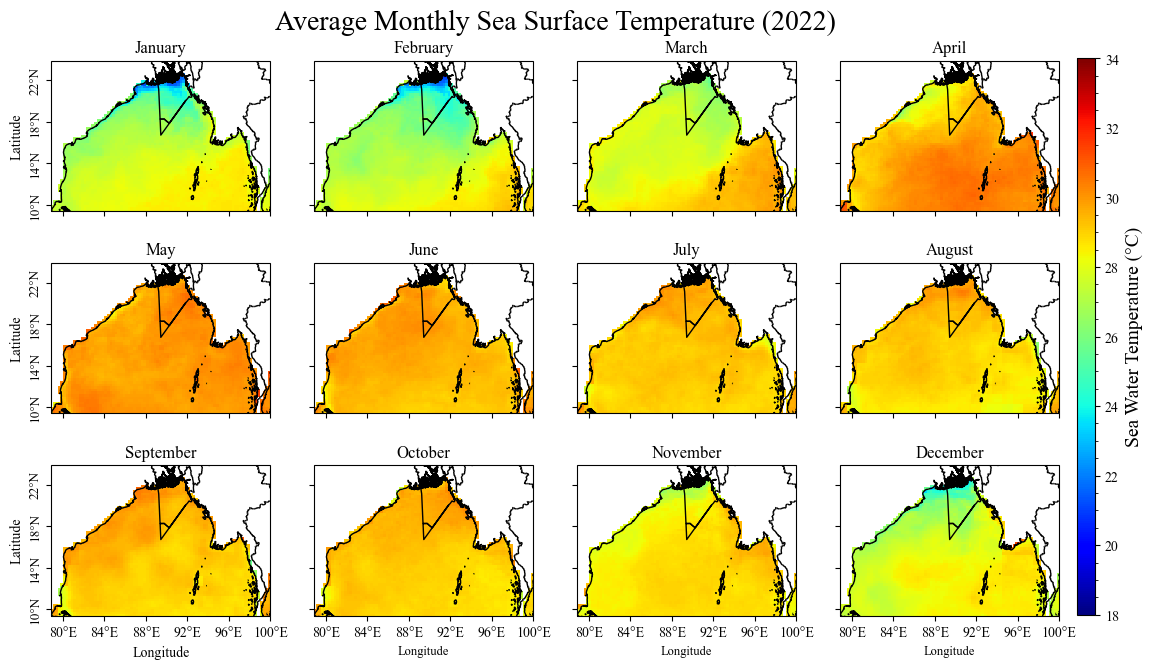

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import netCDF4
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import datetime
import matplotlib.ticker as ticker
import matplotlib.colors as mpl_colors
import glob
import calendar

gdf = gpd.read_file(r"E:\Script\MSP_Data\Bangladesh Exclusive Economic Zone\Bangladesh_Exclusive_Economic_Zone_Boundary_and_Maritime_Boundary.shp")

# Determining overall color range based on the data
overall_vmin = 18      # np.min(sea_water_temp)
overall_vmax = 34     # np.max(sea_water_temp)

# Creating a common colormap
cmap = plt.get_cmap('jet')  

j = 1
rn = 0
cn = 0

for file in glob.glob(r'E:\Script\MSP_Data\Temperature_Base\*.nc'):
    
    data = netCDF4.Dataset(file, mode='r')

    latitude = data.variables['latitude'][:]
    longitude = data.variables['longitude'][:]
    time = data.variables['time'][:]
    sea_water_temp = data.variables['to'][:]

    reference_time = data.variables['time'].units[-10:]
    
    lon, lat = np.meshgrid(longitude, latitude)
    
    fig, ax = plt.subplots(3,4,figsize=(12,7), subplot_kw={'projection': ccrs.PlateCarree()})
    font = {'family' : 'Times New Roman',              
            'weight' : 'normal',  
            'size'   : 8}

    plt.rc('font',**font)
    plt.rc('xtick',labelsize=10)
    plt.rc('ytick',labelsize=10)

    for i in range(0, len(time), 1):
        obs_time = pd.to_datetime(reference_time) + datetime.timedelta(hours=int(time[i]))
        date_string = obs_time.strftime('%d-%m-%Y')

        if obs_time.year == 2022:
             #open figure with size you need
            
            if j%4 == 0:
                r, c = rn,cn
                # print(r, c)
                rn = rn+1
                cn = 0


            else:
                r, c = rn, cn
                # print(r, c)
                cn = cn + 1
            
            #adding project within the opened figure
            extent = (78.875, 99.375, 9.375, 23.875)
            ax[r][c].set_extent(extent, ccrs.PlateCarree())

            mp = ax[r][c].pcolormesh(lon, lat, np.squeeze(sea_water_temp[i, 0, :, :]), cmap=cmap, 
                                     norm=mpl_colors.Normalize(vmin=overall_vmin, vmax=overall_vmax))

            ax[r][c].add_feature(cfeature.COASTLINE)
            ax[r][c].add_feature(cfeature.BORDERS)

            color_dict = {'facecolor': 'none', 'edgecolor': 'black'}

            for row in gdf.iterrows():
                geom = gpd.GeoSeries(row[1].geometry)
                ax[r][c].add_geometries(geom, ccrs.PlateCarree(), **color_dict)
            
            if (r == 0 and c==0) or (r == 1 and c==0):
                xticks = np.arange(80, 101, 4)
                # xlabels = ['{}\u00b0E'.format(x) for x in xticks]
                ax[r][c].set_xticks(xticks)
                ax[r][c].tick_params(axis='x', labelbottom= False, labelsize=10)
                # ax[r][c].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0E"))

                yticks = np.arange(10, 25, 4)
                ax[r][c].set_yticks(yticks)
                ax[r][c].tick_params(axis='y', labelrotation=90, labelsize=9.5)
                ax[r][c].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0N"))

                # ax[r][c].set_xlabel('Longitude', fontsize=10)
                ax[r][c].set_ylabel('Latitude', fontsize=10)
    
                plt.setp(ax[r][c].get_yticklabels(), va='center')
                plt.setp(ax[r][c].get_xticklabels(), ha='center')
            
            elif r == 2 and c == 0:
                xticks = np.arange(80, 101, 4)
                # xlabels = ['{}\u00b0E'.format(x) for x in xticks]
                ax[r][c].set_xticks(xticks)
                ax[r][c].tick_params(axis='x', labelsize=10)
                ax[r][c].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0E"))

                yticks = np.arange(10, 25, 4)
                ax[r][c].set_yticks(yticks)
                ax[r][c].tick_params(axis='y', labelrotation=90, labelsize=9.5)
                ax[r][c].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0N"))

                ax[r][c].set_xlabel('Longitude', fontsize=10)
                ax[r][c].set_ylabel('Latitude', fontsize=10)

                plt.setp(ax[r][c].get_yticklabels(), va='center')
                plt.setp(ax[r][c].get_xticklabels(), ha='center')
                
            elif r == 2 and c != 0:
                xticks = np.arange(80, 101, 4)
                # xlabels = ['{}\u00b0E'.format(x) for x in xticks]
                ax[r][c].set_xticks(xticks)
                ax[r][c].tick_params(axis='x', labelsize=10)
                ax[r][c].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0E"))

                yticks = np.arange(10, 25, 4)
                ax[r][c].set_yticks(yticks)
                ax[r][c].tick_params(axis='y', labelleft= False, labelrotation=90, labelsize=9.5)
                # ax[r][c].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0N"))

                ax[r][c].set_xlabel('Longitude', fontsize=9)
                # ax[r][c].set_ylabel('Latitude', fontsize=9)

                plt.setp(ax[r][c].get_yticklabels(), va='center')
                plt.setp(ax[r][c].get_xticklabels(), ha='center')
            
            else:
                xticks = np.arange(80, 101, 4)
                # xlabels = ['{}\u00b0E'.format(x) for x in xticks]
                ax[r][c].set_xticks(xticks)
                ax[r][c].tick_params(axis='x', labelbottom= False, labelsize=10)
                # ax[r][c].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0E"))

                yticks = np.arange(10, 25, 4)
                ax[r][c].set_yticks(yticks)
                ax[r][c].tick_params(axis='y', labelleft= False, labelrotation=90, labelsize=9.5)
                # ax[r][c].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}\u00b0N"))

                # ax[r][c].set_xlabel('Longitude', fontsize=9)
                # ax[r][c].set_ylabel('Latitude', fontsize=9)

                plt.setp(ax[r][c].get_yticklabels(), va='center')
                plt.setp(ax[r][c].get_xticklabels(), ha='center')

            ax[r][c].set_title('{}'.format(calendar.month_name[obs_time.month]), fontsize=12)
        
            j = j+1

    fig.subplots_adjust(right=0.965, hspace=0.3, top=0.91)
    # Add colorbar to each image
    cbar_ax = fig.add_axes([0.98, 0.115, 0.015, 0.795])
    fig.colorbar(mp, cax=cbar_ax, cmap=cmap, orientation='vertical', pad=0.02, shrink=5.5,
                 norm=mpl_colors.Normalize(vmin=overall_vmin, vmax=overall_vmax))
    # cbar_ax.invert_yaxis()
    cbar_ax.minorticks_on()
    cbar_ax.set_ylabel('Sea Water Temperature (\u00b0C)', fontsize = 14)
    
    fig.suptitle('Average Monthly Sea Surface Temperature (2022)', fontsize=20, x=0.545, y = 0.98)
    plt.savefig(r'E:\Script\MSP_Data_office_PC\Output\Copernicus_Monthly_SST_2022.jpg'.format(j), dpi=600, bbox_inches = 'tight')